In [1]:
# Ensemble : Model들을 같이 엮어서 사용하는 방법 (Ctree 여러개 묶어쓰는 방법)

In [2]:
library(randomForest)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.


In [3]:
set.seed(1234) # 인공신경망, ctree, RandomForest 중 어느 것이 좋은지 판단하기 위해 랜덤값을 동일하기 위해 적음
library(caret)

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: ‘ggplot2’

The following object is masked from ‘package:randomForest’:

    margin



In [4]:
# Sampling 
# 어느 방법이건 해당 단계는 동일
samp <- createDataPartition(iris$Species,p=0.7,list=F) # p : percentage(트레이닝 많이 시키는게 좋음
                                                       # 보통 0.7~0.8 사용함)
samp
# 학습용 데이터 만들기

data.tr <- iris[samp,]
data.tr
# 검증용 데이터 만들기

data.test <- iris[-samp,]
data.test
# 문제 및 정답 만들기

x <- subset(data.test,select = -Species)
y <- data.test$Species

Resample1
2
3
4
5
6
8
9
12
14
15


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa
12,4.8,3.4,1.6,0.2,setosa
14,4.3,3.0,1.1,0.1,setosa
15,5.8,4.0,1.2,0.2,setosa


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
7,4.6,3.4,1.4,0.3,setosa
10,4.9,3.1,1.5,0.1,setosa
11,5.4,3.7,1.5,0.2,setosa
13,4.8,3.0,1.4,0.1,setosa
17,5.4,3.9,1.3,0.4,setosa
18,5.1,3.5,1.4,0.3,setosa
19,5.7,3.8,1.7,0.3,setosa
23,4.6,3.6,1.0,0.2,setosa
25,4.8,3.4,1.9,0.2,setosa


In [5]:
# 학습시키기

model.rf <- randomForest(Species~.,data=data.tr,ntree=100) # factor의 타입(숫자 or Not)에 따라 
                                                           # 객/주관식으로 품

In [6]:
# 검증하기

pred <- predict(model.rf,x)

In [7]:
# 예측력과 오분류표

mean(pred == y)
table(pred,y)

[1] 0.9333333

            y
pred         setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         12         0
  virginica       0          3        15

---
### 교통사고 예측하기(회귀식과 RandomForest 예측 비교)

In [8]:
seoul <- read.csv("./Data/newSeoul2019.csv")
head(seoul)

년도,월,자치구명,발생건수,사망자수,부상자수
2011,1,종로구,115,2,165
2011,2,종로구,99,0,134
2011,3,종로구,116,0,162
2011,4,종로구,110,1,153
2011,5,종로구,122,0,157
2011,6,종로구,116,3,163


In [9]:
# 종로구 데이터셋 만들기

JongRo <- subset(seoul,seoul$자치구명=="종로구")
nrow(JongRo)

[1] 108

In [10]:
head(JongRo)
tail(JongRo)

년도,월,자치구명,발생건수,사망자수,부상자수
2011,1,종로구,115,2,165
2011,2,종로구,99,0,134
2011,3,종로구,116,0,162
2011,4,종로구,110,1,153
2011,5,종로구,122,0,157
2011,6,종로구,116,3,163


,년도,월,자치구명,발생건수,사망자수,부상자수
2407,2019,7,종로구,83,0,109
2408,2019,8,종로구,115,0,164
2409,2019,9,종로구,99,0,143
2410,2019,10,종로구,104,0,139
2411,2019,11,종로구,100,0,126
2412,2019,12,종로구,100,0,142


In [11]:
# row names 정리하기

rownames(JongRo) <- c()
tail(JongRo)

,년도,월,자치구명,발생건수,사망자수,부상자수
103,2019,7,종로구,83,0,109
104,2019,8,종로구,115,0,164
105,2019,9,종로구,99,0,143
106,2019,10,종로구,104,0,139
107,2019,11,종로구,100,0,126
108,2019,12,종로구,100,0,142


In [12]:
str(JongRo)

'data.frame':	108 obs. of  6 variables:
 $ 년도    : int  2011 2011 2011 2011 2011 2011 2011 2011 2011 2011 ...
 $ 월      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ 자치구명: Factor w/ 25 levels "강남구","강동구",..: 23 23 23 23 23 23 23 23 23 23 ...
 $ 발생건수: int  115 99 116 110 122 116 103 122 121 135 ...
 $ 사망자수: int  2 0 0 1 0 3 1 1 2 2 ...
 $ 부상자수: int  165 134 162 153 157 163 154 171 166 193 ...


In [13]:
# factor 정리하기

JongRo$자치구명 <- factor(JongRo$자치구명)
str(JongRo)

'data.frame':	108 obs. of  6 variables:
 $ 년도    : int  2011 2011 2011 2011 2011 2011 2011 2011 2011 2011 ...
 $ 월      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ 자치구명: Factor w/ 1 level "종로구": 1 1 1 1 1 1 1 1 1 1 ...
 $ 발생건수: int  115 99 116 110 122 116 103 122 121 135 ...
 $ 사망자수: int  2 0 0 1 0 3 1 1 2 2 ...
 $ 부상자수: int  165 134 162 153 157 163 154 171 166 193 ...


In [14]:
# 종로의 발생건수와 부상자수 상관계수

cor(JongRo$발생건수,JongRo$부상자수)

[1] 0.9208914

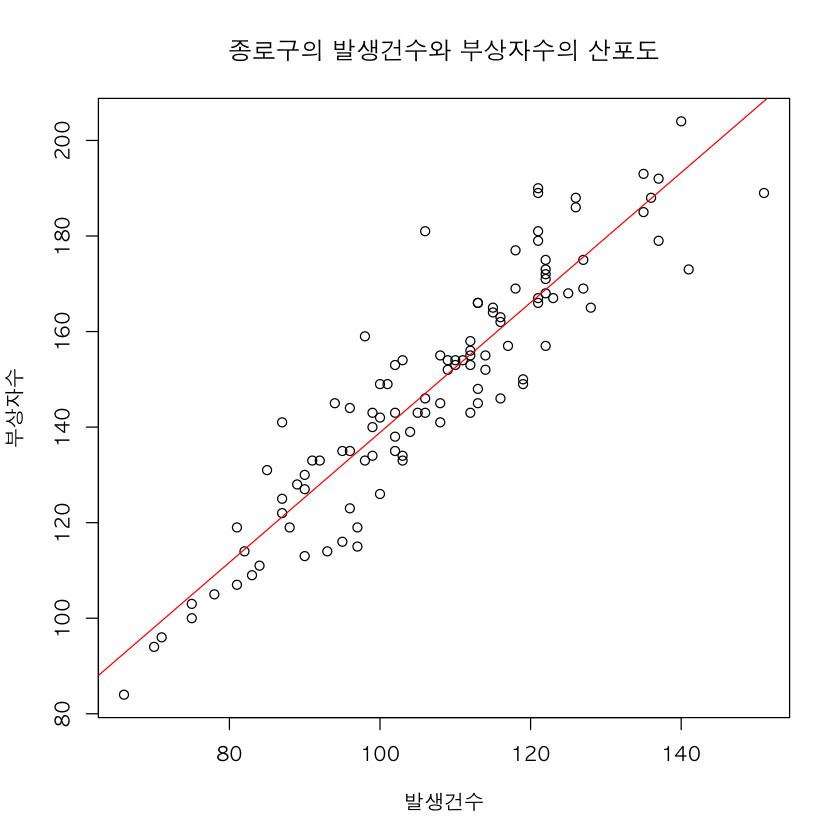

In [15]:
# 종로구의 발생건수와 부상자수의 산포도
options(warn=-1)
par(family = "AppleGothic")
plot(JongRo$발생건수,JongRo$부상자수,
     xlab = "발생건수",
     ylab = "부상자수",
     main = "종로구의 발생건수와 부상자수의 산포도"
    )
r <- lm(JongRo$부상자수~JongRo$발생건수)
abline(r,col="red")

In [16]:
# 예측력

summary(r)


Call:
lm(formula = JongRo$부상자수 ~ JongRo$발생건수)

Residuals:
    Min      1Q  Median      3Q     Max 
-21.637  -5.949  -0.019   5.301  33.961 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      2.88612    6.05535   0.477    0.635    
JongRo$발생건수  1.35993    0.05591  24.322   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.816 on 106 degrees of freedom
Multiple R-squared:  0.848,	Adjusted R-squared:  0.8466 
F-statistic: 591.6 on 1 and 106 DF,  p-value: < 2.2e-16


> Adjusted R-squared:  0.8466

In [17]:
r


Call:
lm(formula = JongRo$부상자수 ~ JongRo$발생건수)

Coefficients:
    (Intercept)  JongRo$발생건수  
          2.886            1.360  


In [18]:
# 회귀식
# -발생건수가 100건일 경우의 부상자수 예측
 1.360 * 100 + 2.886

[1] 138.886

In [19]:
# 랜덤포레스트로 예측
# -발생건수가 100건일 경우의 부상자수 예측

result = c()
for(i in 1:5){
    model.rf <- randomForest(부상자수~발생건수,data=JongRo,ntree=100)
    pred <- predict(model.rf,data.frame(발생건수=100))
    result <- append(result,pred)
}
result
mean(result)

1        1        1        1        1 
139.5719 140.3197 139.7332 139.7267 138.6287

[1] 139.596

In [20]:
# 회귀식
# -발생건수가 145건일 경우의 부상자수 예측
 
1.360 * 145 + 2.886

[1] 200.086

In [21]:
# 랜덤포레스트로 예측
# -발생건수가 145건일 경우의 부상자수 예측

result = c()
for(i in 1:5){
    model.rf <- randomForest(부상자수~발생건수,data=JongRo,ntree=100)
    pred <- predict(model.rf,data.frame(발생건수=145))
    result <- append(result,pred)
}
mean(result)

[1] 184.5207

In [22]:
# 회귀식
# -발생건수가 150건일 경우의 부상자수 예측
 
1.360 * 150 + 2.886

[1] 206.886

In [23]:
# 랜덤포레스트로 예측
# -발생건수가 150건일 경우의 부상자수 예측

result = c()
for(i in 1:5){
    model.rf <- randomForest(부상자수~발생건수,data=JongRo,ntree=100)
    pred <- predict(model.rf,data.frame(발생건수=150))
    result <- append(result,pred)
}
mean(result)

[1] 185.1801

In [24]:
# 회귀식
# -발생건수가 85건일 경우의 부상자수 예측
 
1.360 * 85 + 2.886

[1] 118.486

In [25]:
# 랜덤포레스트로 예측
# -발생건수가 85건일 경우의 부상자수 예측

result = c() # 데이터를 담을 수 있는 result라는 틀을 만듬 
for(i in 1:5){ # 반복횟수는 임의로 한 것임
    model.rf <- randomForest(부상자수~발생건수,data=JongRo,ntree=100)
    pred <- predict(model.rf,data.frame(발생건수=85)) # predict(모델명, 데이터프레임타입)
    result <- append(result,pred)
}
mean(result)

[1] 123.9382

In [26]:
# 회귀식
# -발생건수가 200건일 경우의 부상자수 예측
 
1.360 * 200 + 2.886

[1] 274.886

In [27]:
# 랜덤포레스트로 예측
# -발생건수가 200건일 경우의 부상자수 예측

result = c()
for(i in 1:5){
    model.rf <- randomForest(부상자수~발생건수,data=JongRo,ntree=100)
    pred <- predict(model.rf,data.frame(발생건수=200))
    result <- append(result,pred)
}
mean(result)

[1] 185.0395

In [28]:
# plot을 보면 85,145,150,200일 때의 데이터가 별로 없어 회귀식을 통한 예측결과와 랜덤포레스트를 통한 예측결과의 차이가
# 다른 수 일때보다 차이가 많이 난다.